## Use Yahoo finance API to test quantitative investment strategies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import os
import datetime
from IPython.display import display 

## 1. Load in stock prices database

Run the cell below to load in historical stock prices for companies in database (5 years).

Add any company's stock to the database. Add the company's name and ticker to the dictionary below. Run the cell to download the stock's historical prices and add to database (caution: have not debugged this code for case of companies with < 5 years of historical prices)

In [2]:
stocks = {

    'Microsoft': 'MSFT',
    'Apple': 'AAPL',
    'NVIDIA': 'NVDA',
    'Boeing': 'BA',
    'Tesla': 'TSLA',
    'FuelCell Energy': 'FCEL',
    'Ballard Power Systems': 'BLDP',
    'Plug Power': 'PLUG',
    'General Electric': 'GE',
    'NextEra': 'NEP',
    'Siemens Gamesa Renewable Energy': 'GCTAY',
    'Vestas': 'VWDRY',
    'First Solar': 'FSLR',
    'Jinko Solar': 'JKS',
    'Sunpower': 'SPWR',
    'Enphase Energy': 'ENPH',
    'SunRun': 'RUN',
    'Invesco Solar ETF': 'TAN',
    'Brookfield Renewable': 'BEP',
    'Ormat Technologies': 'ORA'
    
}

if os.path.exists('stock_data.csv'):
    db = pd.read_csv('stock_data.csv', index_col = [0]) # Read in stock prices database
    db.index = pd.to_datetime(db.index)
    dates = db.index
    
else:
    db = pd.DataFrame()
    dates = [datetime.date.today() - datetime.timedelta(days = 5*365.25), datetime.date.today() - datetime.timedelta(days = 1)]

new_company_detected = False
for s in stocks:
    
    if s in db.columns:
        continue
    else:
        print('Stock prices for {} not found in database...'.format(s))
        new_company_detected = True
        
    print('Retrieving historical stock prices for {}...'.format(s))
    
    stock = yf.Ticker(stocks[s])
    hist = stock.history(start = dates[0], end = dates[-1] + datetime.timedelta(days=1))
    
    if not os.path.exists('stock_data.csv'):
        dates = hist.index
        db = db.reindex(dates)
        dates = db.index
    hist = hist.reindex(db.index)
    
    db[s] = ""
    db[s] = hist['Open'].values
    
    print('Done.')

if new_company_detected: # If new company has been added to database
    db.to_csv('stock_data.csv') # Update stock prices database

In [3]:
db # Past 5 years of opening market prices of companies

,Microsoft,Apple,NVIDIA,Boeing,Tesla,FuelCell Energy,Ballard Power Systems,Plug Power,General Electric,NextEra,Siemens Gamesa Renewable Energy,Vestas,First Solar,Jinko Solar,Sunpower,Enphase Energy,SunRun,Invesco Solar ETF,Brookfield Renewable,Ormat Technologies
Date,,,,,,,,,,,,,,,,,,,,
2016-01-19,46.977139,22.793515,27.073626,113.078176,41.742001,60.119999,1.250000,1.670000,24.574050,22.087148,2.690295,19.669501,62.209999,19.680000,15.245580,2.270000,7.830000,22.293222,8.136995,32.494040
2016-01-20,45.608344,22.026860,26.232162,110.354932,39.880001,58.320000,1.200000,1.470000,23.898097,21.014486,2.690295,19.355527,60.400002,18.430000,13.889980,2.100000,7.250000,20.673076,7.912774,31.995599
2016-01-21,46.539123,22.480828,27.181261,109.260275,40.310001,58.799999,1.190000,1.600000,24.069220,20.356255,2.690295,18.662940,61.290001,19.309999,14.741323,2.100000,8.620000,21.413715,7.876611,31.803899
2016-01-22,46.913261,22.844472,27.719406,110.728695,40.959999,61.080002,1.400000,1.790000,24.428590,20.608170,2.690295,19.152368,65.099998,20.459999,15.664702,2.550000,9.370000,22.376546,8.570968,32.321501
2016-01-25,47.396895,23.513845,27.827038,110.888888,40.012001,63.000000,1.340000,1.790000,24.231789,20.681306,2.690295,19.327824,66.559998,20.580000,16.005239,2.430000,8.780000,22.552448,8.806036,32.714496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,218.470001,129.190002,536.750000,203.029999,849.400024,14.300000,27.750000,48.860001,11.110000,78.160004,9.010000,81.610001,101.510002,64.699997,28.320000,200.399994,91.550003,115.279999,48.500000,114.000000
2021-01-12,216.500000,128.500000,550.099976,206.649994,831.000000,16.750000,31.350000,62.400002,11.510000,78.669998,9.100000,77.879997,104.470001,66.599998,30.170000,204.880005,98.000000,117.220001,47.509998,111.349998
2021-01-13,214.020004,128.759995,539.599976,207.149994,852.760010,20.540001,36.900002,70.300003,11.780000,81.860001,8.700000,78.830002,104.580002,66.139999,30.490000,205.470001,93.570000,116.160004,47.500000,109.000000


## 2. Investment strategy testing

### Key considerations in quantitative investment portfolio design:

1. For how long will the portfolio be held? (For now, let's say 6 months)
2. How often will the portfolio be re-balanced? (May depend on price of re-balancing; for now, let's say once per 2 months)

#### Testing strategy:

1. Split historical data into 4 overlapping 2-year folds (years 0-2, years 1-3, years 2-4, years 3-5)
2. "Train" algorithm on first 18 months of data for each fold.
3. "Test" algorithm on last 6 months of data for each fold.

### Investment strategy: 

## Multi-stage Stochastic Programming with Random Stock Price Scenarios

We will use linear SDE model of stock prices $S(t)$,

$dS(t) = \mu S(t) dt + \sigma S(t)dW(t)$

where W(t) is a Wiener process, and $\mu$ and $\sigma$ are constants to be estimated from the historical training data. Note that this equation has closed form solution

$S(t) = S(0) e^{(\mu - \frac{\sigma^2}{2})t + \sigma W(t)}$

Therefore, given an estimate of $\mu$ and $\sigma$ from the historical prices of a particular stock, we can generate a Monte Carlo simulation of a stock's future price at time periods $T = 0, 1, 2, 3$ (corresponding to the present, 2 months from the present, 4 months from the present, and 6 months from the present) using the above equation and a simulated Wiener process.

It also seems reasonable that the Wiener process underlying each stock price model may be correlated. We can estimate the covariance/cross-correlation matrix of the Wiener processes underlying each stock's price, and use this cross-correlation matrix to generate correlated Wiener processes for each stock price model, so that our stock price scenarios preserve the price correlations observed in the historical data.

We will generate 10 stock price scenarios at each time step $T = 1, 2, 3$, so we ultimately model $10^3 = 1000$ distinct, equally-probable scenarios. Then, we will use a stochastic program to optimize investment decision at $T = 0$.

We then allow the portfolio to be re-balanced every two months by running the same stochastic program (with fewer future stages in each iteration, always trying to optimize the final portfolio value at T = 3) and calculate the portfolio's return over the 6 month period for which it is held.

### Estimation of $\mu$ and $\sigma$ for a stock

At time $t$, change in stock price should be approximated by

$\Delta S(t) = \mu S(t) \Delta t + \sigma S(t) \Delta W(t)$

where $\Delta W(t) \sim  N(0, \Delta t)$ and $\Delta t =$ 1 day (our time series are daily opening stock prices). We would like to obtain $\Delta W(t)$ for a stock.

We can get $\sigma \Delta W(t) = \frac{\Delta S(t) - \mu S(t)}{S(t)} = \frac{\Delta S(t)}{S(t)} - \mu \sim N(0, \sigma^2 \Delta t)$ for each time period. Therefore, 

$\frac{\Delta S(t)}{S(t)} \sim N(\mu, \sigma^2)$ since $\Delta t$ is 1 in our case. 

Therefore, we should calculate for each time step, and estimate the mean and sample variance. We should also perform t-test to determine whether mean is significantly different from 0.

Note: if you can find historical options prices you can use Black-Scholes options pricing model to obtain the "implied volatility" $\sigma$ of each stock. Then, modeling the stock price is only a matter of determining $\mu$ and whether it is likely to actually differ from 0.

The advantage of doing this is that options prices are available today (and indeed in each re-balancing period) for different expiration dates in the future, and allow us to determine the implied volatility of the stock at multiple points in the future. It then becomes possible to model non-constant stock volatility, as the implied volatility from options that expire at different times may be significantly different, in a way that may reflect real-world uncertainty in the price of the underlying stock at different times in the future. For example, the price of options that expire in May of this year for a particular stock may be substantially different than the price of options that expire in December, if the company in question is expected to announce a major change in between May and December.

This may be a slippery slope into "trading" as opposed to "investment." However, this is also a way to make good use of available information from the market. Options prices are a "natural" way to determine stock price volatility and therefore risk. Furthermore, they may do a better job of incorporating "real-world" risk considerations than raw historical stock prices will. So, fitting $\sigma$ to historical data may not be as useful as getting implied volatility from Black-Scholes equation.

### Downside Risk Constraint

Right now, optimization usually picks stocks with highest drift coefficient $\mu$ regardless of volatility $\sigma$, or even some combination of large $\mu$ and large $\sigma$, as these stocks have the greatest potential for growth over a short-term. However, this strategy ignores the downside risk associated with high stock price volatility. Therefore, we should simultaneously seek to minimize the downside risk of a portfolio while maximizing potential growth.

How can we do this in scenario-based optimization? Given a fixed portfolio, the model is aware of the returns associated with the portfolio in each scenario. If there is a particular scenario where the return of the portfolio is extremely negative, we should avoid choosing this portfolio.

We can define the loss associated with a portfolio $x$ as $- \min \{R_{i,s} * S_{i}(0) * x_{i}: s \in S \}$ where $S = \{1, 2, ..., N_S\}$ is our s}et of scenarios and $R_{i,s}$ is the return of stock $i$ in scenario $s$, and $x_i$ is the number of shares of stock $i$ in portfolio.

We can either choose to minimize the loss (simultaneously or non-simultaneously with another objective, like minimizing maximum regret or maximizing expected return), or constrain the maximum loss by a certain value, above which the portfolio will incur a large penalty.

In [107]:
companies = db.columns
dates = db.index

start = db.index[0]
end = db.index[-1]
len_data = round((end - start).days/365) # Get approx. length of data in years

# Split data into folds and save folds

n_folds = 4
len_folds = 2 # Years
folds = [] # List of fold dataframes
for i in range(n_folds):
    start_fold = dates[50*5*i]
    end_fold = dates[50*5*(i+len_folds)]
    fold = db.loc[start_fold:end_fold]
    folds.append(fold)

In [229]:
# Select a fold and split into testing and training data

db_fold = folds[2] # Get fold
dates_fold = db_fold.index # Get dates of fold
start_fold = dates_fold[0]
end_fold = dates_fold[-1]

# Split fold into training/testing data

split_date = dates_fold[-6*30] # 6 months of testing data

df_train = db_fold[start_fold:split_date - datetime.timedelta(days=1)]
df_test = db_fold[split_date:end_fold]

<AxesSubplot:xlabel='Date'>

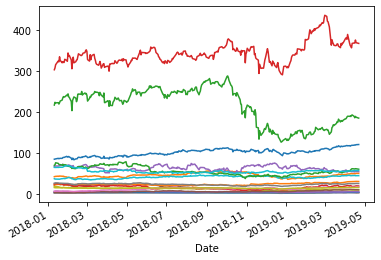

In [230]:
df_train.plot(legend = False)

### 1. Fit linear SDE to stock prices.

In [231]:
sigdWt = (df_train.shift(-1) - df_train)/df_train # Get sigma * dW(t) for each stock/time period
sigdWt.dropna(inplace = True) # Drop shifted row

mus = sigdWt.mean(axis = 0) # For each stock
sigmas = sigdWt.std(axis = 0) # For each stock

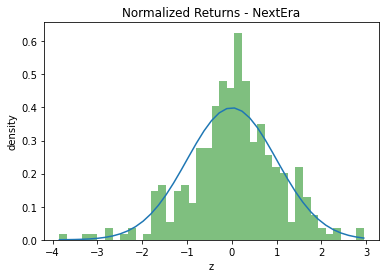

In [232]:
# Show an example of a company's normalized returns

stock = companies[9]
mu = mus[stock]
sigma = sigmas[stock]

from scipy.stats import norm

z = (sigdWt[stock] - mu)/sigma # Non-zero mean
z = (sigdWt[stock])/np.sqrt(np.mean(sigdWt[stock]**2)) # Zero mean

g = plt.hist(z, bins = 40, color = 'green', alpha = 0.5, density = True, label = 'Data')
plt.plot(g[1], norm.pdf(g[1]), label = 'Normal PDF')
plt.title('Normalized Returns - {}'.format(stock))
plt.xlabel('z')
plt.ylabel('density')
plt.show()

### 2. Now, estimate cross-correlation matrix from the $\Delta W(t)$.

In [233]:
dWt = (sigdWt - mus)/sigmas

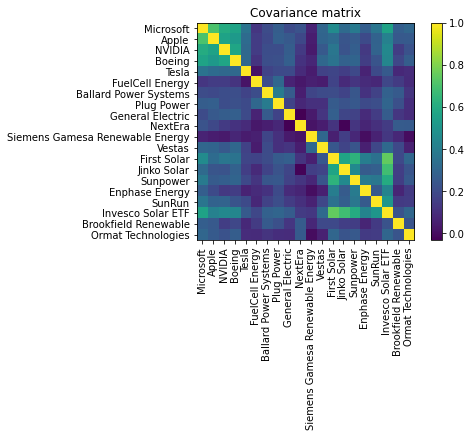

In [234]:
cov = np.cov(dWt.T) # Since data are normalized, this *is* the cross-correlation matrix as well

plt.imshow(cov)
plt.title('Covariance matrix')
plt.xticks(np.arange(0, len(companies)), companies, rotation = 90)
plt.yticks(np.arange(0, len(companies)), companies)
plt.colorbar()
plt.show()

### 3. Now generate vectors of $n$ correlated multi-variate normal r.v.'s with 0 mean and same covariance matrix. Each vector corresponds to $\Delta W(t)$ for all stocks at a particular time step in a particular scenario.

Note that, since W(t) is a Wiener process, $W(k\Delta t) \sim N(0, k \Delta t) \sim \sqrt{k} N(0, \Delta t)$. Furthermore, $\Delta t$ = 1.

Since each re-balancing period will be 60 days apart, we may multiply our randomly generated vectors by $k = 60 days$ to get the appropriately sized $\Delta W(t)$.

In [235]:
N_scenarios = 50
k = 60 # Days between stages in optimization / portfolio re-balancing
n = len(companies) # Number of assets

df_scen = pd.DataFrame()
current_date = df_train.index[-1]
rebalance_date = current_date + datetime.timedelta(days = k)

for scen in range(N_scenarios):
    
    dWt_sim = np.sqrt(k) * np.random.multivariate_normal(np.zeros(n), cov)
    
    S0 = df_train.loc[current_date]
    S1 = S0*np.exp((mus - (sigma**2)/2)*k + sigmas*dWt_sim)
        
    df_scen[scen] = ""
    df_scen[scen] = S1
    
df_scen.index = companies 
df_scen = df_scen.T

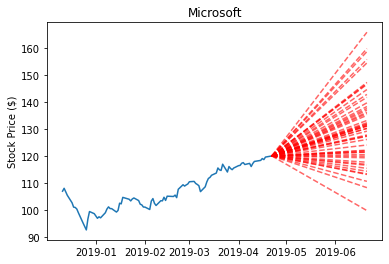

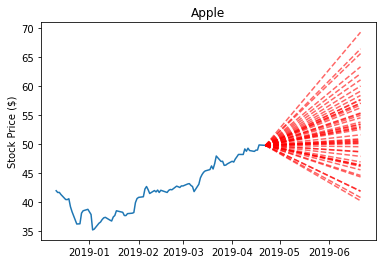

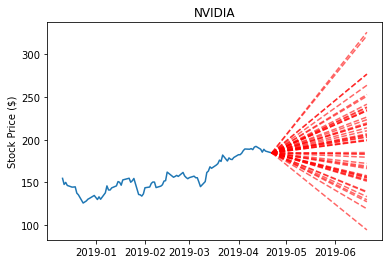

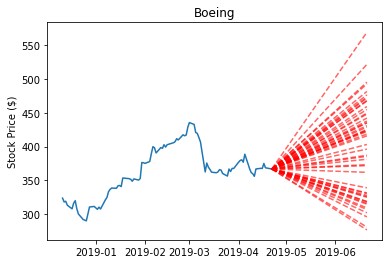

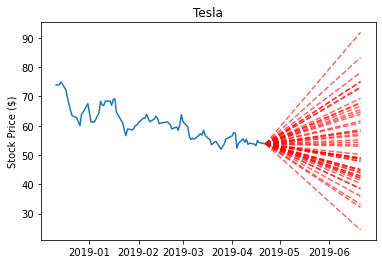

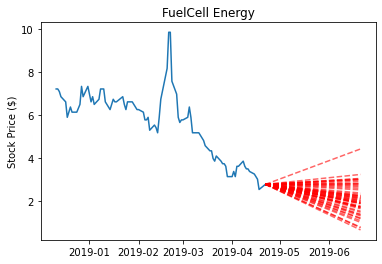

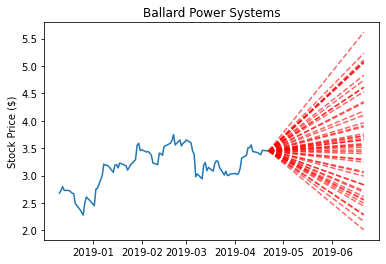

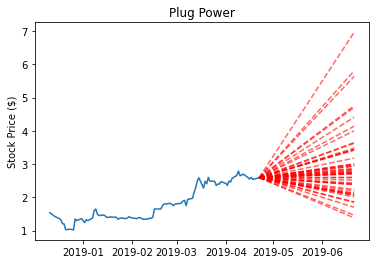

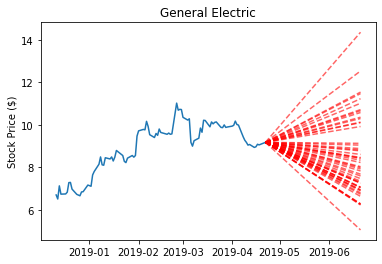

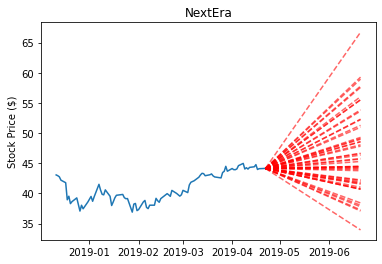

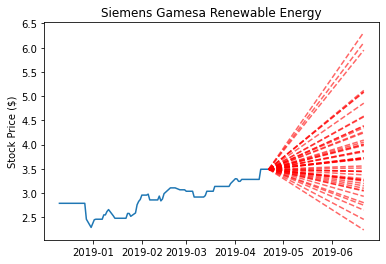

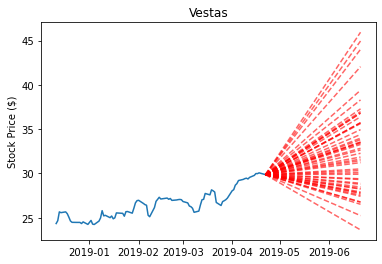

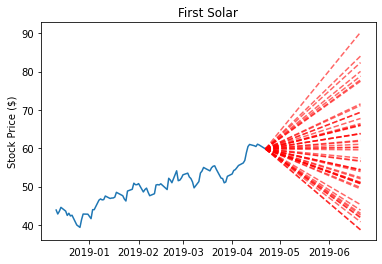

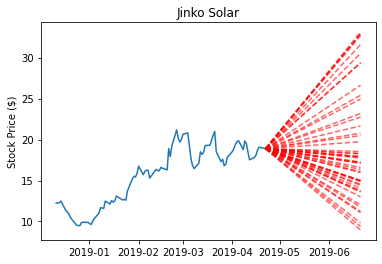

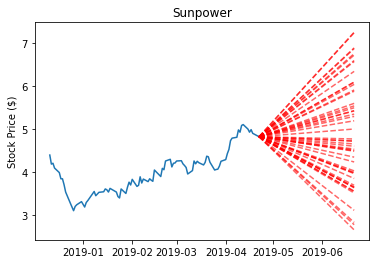

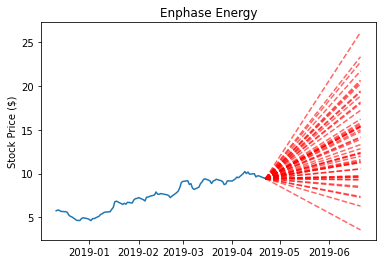

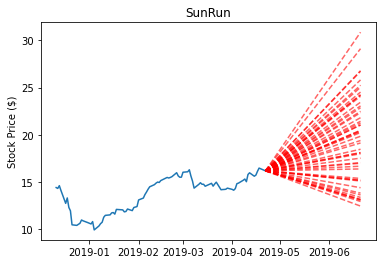

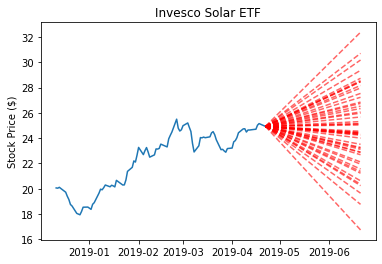

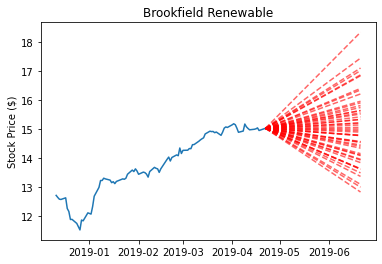

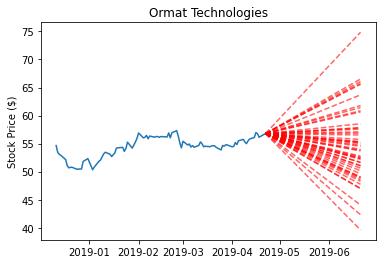

In [236]:
for s in companies:
    S0 = df_train[s][current_date]

    plt.plot(df_train[s][-90::])

    for scen in range(N_scenarios):
        plt.plot([current_date, rebalance_date], [S0, df_scen[s][scen]], 'r--', alpha = 0.6)
    
    plt.title(s)
    plt.ylabel('Stock Price ($)')
    plt.show()

### 4. Set up 2-stage stochastic program to choose optimal portfolio at current time.

In [237]:
from pyomo.environ import *

In [251]:
budget = 4000 # USD
max_loss = 2000 # USD (must be >= 0)

In [252]:
S0 = df_train.loc[current_date]
S0_dict = {i+1: val for i, val in enumerate(S0)}

S1_dict = {}
for scen in range(N_scenarios):
    S1 = df_scen.loc[scen]
    for i, val in enumerate(S1):
        S1_dict[(i+1, scen + 1)] =  val

In [253]:
# Stochastic Program

# Construct optimization model
model = ConcreteModel()

# Sets
model.stocks = RangeSet(n)
model.scenarios = RangeSet(N_scenarios) # multiply by another Rangeset for multi-stage?; right now, we will just end up with highest expected return for stocks

# Variables
model.x = Var(model.stocks, domain=NonNegativeReals) # First-stage decision variable for portfolio investment
model.loss = Var(domain = Reals) # Auxiliary variable for scenario loss associated with portfolio
model.slack = Var(domain = NonNegativeReals)

# Parameters
model.B = Param(initialize = budget) # Budget for portfolio investment
model.p = Param(initialize = 1/N_scenarios) # Scenario probability (flat 1/N dist.)
model.max_loss = Param(initialize = max_loss) # Maximum acceptable loss
model.slack_penalty = Param(initialize = budget*1e2) # Penalty for surpassing risk threshold

model.S0 = Param(model.stocks, initialize = S0_dict) # Initial stock prices
model.S1 = Param(model.stocks, model.scenarios, initialize = S1_dict) # Scenario stock prices

# Objective
def objective(model): # Define objective function
    return sum(model.p*model.S1[s, sc]*model.x[s] for s, sc in model.stocks*model.scenarios) \
            - sum(model.S0[s]*model.x[s] for s in model.stocks) \
            - model.slack_penalty*model.slack
model.obj = Objective(rule = objective, sense = maximize)

# Constraints
def budget_const(model):
    return sum(model.S0[s]*model.x[s] for s in model.stocks) <= model.B
model.budget_const = Constraint(rule = budget_const)

def loss_const(model, sc): # Scenario loss
    return model.loss >= - sum(model.S1[s,sc]*model.x[s] - model.S0[s]*model.x[s] for s in model.stocks)
model.loss_const = Constraint(model.scenarios, rule = loss_const)

def risk_const(model): # Constrain maximum scenario loss
    return model.loss - model.slack <= model.max_loss # If any scenario loss exceeds max loss, slack variable becomes non-zero and incurs penalty
model.risk_const = Constraint(rule = risk_const)

# Solve model
opt = SolverFactory('glpk')
opt.solve(model)
x_opt = np.array([model.x[i].value for i in model.stocks])

print('Selected Portfolio:\n')
print(x_opt*S0)

Selected Portfolio:

Microsoft                             0.000000
Apple                                 0.000000
NVIDIA                                0.000000
Boeing                                0.000000
Tesla                                 0.000000
FuelCell Energy                       0.000000
Ballard Power Systems                 0.000000
Plug Power                          685.923195
General Electric                      0.000000
NextEra                               0.000000
Siemens Gamesa Renewable Energy       0.000000
Vestas                                0.000000
First Solar                           0.000000
Jinko Solar                           0.000000
Sunpower                              0.000000
Enphase Energy                     3314.076805
SunRun                                0.000000
Invesco Solar ETF                     0.000000
Brookfield Renewable                  0.000000
Ormat Technologies                    0.000000
Name: 2019-04-22 00:00:00, dtype: float

In [241]:
# Mini-max Regret

# Get perfect information scenario returns / objective function value
obj_opts = {}

for sc in range(N_scenarios):
    
    '''
    # For perfect information scenarios, sc is effectively fixed since it is "known" which scenario will occur
    x_opt[s, sc] = budget/S0[s] for highest return stock; 0 for all other stocks
    objective = sum(S1[s, sc]*x_opt[s, sc] - s0[s]*x_opt[s, sc] for s in stocks) = budget * max(S1[s, sc]) - s0[s] for s in stocks)
    '''
    
    obj_opt = 0 # We know objective >= 0 since we can always do "nothing" if all stocks have bad returns
    
    for s in range(n):
        z = budget*(S1_dict[(s+1, sc+1)] - S0_dict[s+1])/S0_dict[s+1] # Return for stock s in scenario sc times budget
        if z > obj_opt:
            obj_opt = z # Save if highest-yet-observed return among stocks (this will end up with the maximum possible stock return)
        
    obj_opts[sc+1] = obj_opt
    
    
# Construct optimization model
model = ConcreteModel()

# Sets
model.stocks = RangeSet(n)
model.scenarios = RangeSet(N_scenarios)

# Variables
model.x = Var(model.stocks, domain=NonNegativeReals) # First-stage decision variable for portfolio investment
model.zeta = Var(domain = NonNegativeReals) # Auxiliary variable for maximum scenario regret

# Parameters
model.B = Param(initialize = budget) # Budget for portfolio investment
model.opts = Param(model.scenarios, initialize = obj_opts) # Perfect information scenario costs

model.S0 = Param(model.stocks, within=Reals, initialize = S0_dict) # Initial stock prices
model.S1 = Param(model.stocks, model.scenarios, within = Reals, initialize = S1_dict) # Scenario stock prices


# Objective
def objective(model): # Define objective function
    return model.zeta
model.obj = Objective(rule = objective, sense = minimize)

# Constraints
def budget_const(model):
    return sum(model.S0[s]*model.x[s] for s in model.stocks) <= model.B
model.budget_const = Constraint(rule = budget_const)

def regret_const(model, sc): # Maximum scenario regret constraint
    return model.zeta >= model.opts[sc] - sum(model.S1[s, sc]*model.x[s] - model.S0[s]*model.x[s] for s in model.stocks)
model.regret_const = Constraint(model.scenarios, rule = regret_const)


# Solve model
opt = SolverFactory('glpk')
opt.solve(model)
x_opt = np.array([model.x[i].value for i in model.stocks])

print('Selected Portfolio:\n')
print(x_opt*S0)

Selected Portfolio:

Microsoft                             0.000000
Apple                                 0.000000
NVIDIA                                0.000000
Boeing                                0.000000
Tesla                                 0.000000
FuelCell Energy                       0.000000
Ballard Power Systems                 0.000000
Plug Power                         1281.767775
General Electric                      0.000000
NextEra                               0.000000
Siemens Gamesa Renewable Energy     636.121652
Vestas                                0.000000
First Solar                           0.000000
Jinko Solar                           0.000000
Sunpower                              0.000000
Enphase Energy                     2082.110572
SunRun                                0.000000
Invesco Solar ETF                     0.000000
Brookfield Renewable                  0.000000
Ormat Technologies                    0.000000
Name: 2019-04-22 00:00:00, dtype: float

### See which stocks had highest 2-month returns, and compare 2-month returns to return of chosen portfolio.

In [248]:
mod_rebalance_date = df_test.index[np.argmin(np.abs(df_test.index - rebalance_date))]

In [249]:
S1 = df_test.loc[mod_rebalance_date]
returns = 100*(S1 - S0)/S0
print(returns.sort_values(ascending=False))

Enphase Energy                     93.213136
Sunpower                           41.168481
Jinko Solar                        19.640027
General Electric                   15.351349
SunRun                             14.567893
Invesco Solar ETF                  12.145415
Brookfield Renewable               12.116954
Microsoft                          11.797067
Ormat Technologies                 10.298649
Ballard Power Systems               6.376812
First Solar                         5.063501
NextEra                             2.878956
Siemens Gamesa Renewable Energy     1.142856
Boeing                              0.226486
Apple                              -1.609455
Vestas                             -2.080584
Plug Power                        -11.196910
NVIDIA                            -17.089177
Tesla                             -19.620818
FuelCell Energy                   -91.666666
dtype: float64


In [254]:

print('Actual 2-month portfolio return between {} and {}: ${:.2f} ({:.2f}%)'.format(str(current_date.date()),\
                                                                                        str(rebalance_date.date()),\
                                                                            sum(x_opt*S0*returns/100),\
                                                                            sum(x_opt*S0*returns)/sum(S0*x_opt)))

print('Maximum 2-month return of stocks between {} and {}: ${:.2f} ({:.2f}%)'.format(str(current_date.date()),\
                                                                                              str(rebalance_date.date()),\
                                                                                              budget*np.max(returns)/100,\
                                                                                              np.max(returns)))

Actual 2-month portfolio return between 2019-04-22 and 2019-06-21: $3012.35 (75.31%)
Maximum 2-month return of stocks between 2019-04-22 and 2019-06-21: $3728.53 (93.21%)
